In [1]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np


data = pd.read_csv('./data/passwords.csv')

data['length'] = data['password'].apply(len)
data['num_letters'] = data['password'].str.count(r'[A-Za-z]')
data['num_digits'] = data['password'].str.count(r'[0-9]')
data['pw_type'] = np.where(data['num_letters'] > 0, 
                           np.where(data['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                           'Digits Only')

le_cat = LabelEncoder()
le_pw = LabelEncoder()

data['pw_type'] = le_pw.fit_transform(data['pw_type'])
data['category'] = le_cat.fit_transform(data['category'])


X = data[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values

def convert_to_seconds(value, unit):
    unit_to_seconds = {
        'seconds': 1,
        'minutes': 60,
        'hours': 3600,
        'days': 86400,
        'weeks': 604800,
        'months': 2628000,  
        'years': 31536000
    }
    return value * unit_to_seconds[unit]


data['value_in_seconds'] = data.apply(lambda row: convert_to_seconds(row['value'], row['time_unit']), axis=1)

# y = data['offline_crack_sec'].values.reshape(-1, 1)  # target: offline 

y = data['value_in_seconds'].values.reshape(-1, 1) # online
y = np.log1p(data['value_in_seconds'].values.reshape(-1, 1))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_log = np.log1p(y)  


# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n=2
regressor = TabNetRegressor(verbose=1, n_steps = 1, n_d = n, n_a = n)

regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=150,
    patience=50,
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)



C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 183.16205| test_rmse: 13.21563|  0:00:00s
epoch 1  | loss: 182.19919| test_rmse: 13.18708|  0:00:00s
epoch 2  | loss: 179.9933| test_rmse: 13.14134|  0:00:00s
epoch 3  | loss: 177.88184| test_rmse: 13.10071|  0:00:00s
epoch 4  | loss: 176.56987| test_rmse: 13.07853|  0:00:00s
epoch 5  | loss: 174.70534| test_rmse: 13.03191|  0:00:00s
epoch 6  | loss: 172.90091| test_rmse: 12.98848|  0:00:00s
epoch 7  | loss: 172.09579| test_rmse: 12.92669|  0:00:00s
epoch 8  | loss: 170.65559| test_rmse: 12.86591|  0:00:01s
epoch 9  | loss: 169.11629| test_rmse: 12.81219|  0:00:01s
epoch 10 | loss: 167.35727| test_rmse: 12.76214|  0:00:01s
epoch 11 | loss: 165.24159| test_rmse: 12.71419|  0:00:01s
epoch 12 | loss: 162.96741| test_rmse: 12.65596|  0:00:01s
epoch 13 | loss: 159.9632| test_rmse: 12.58235|  0:00:01s
epoch 14 | loss: 157.34679| test_rmse: 12.49812|  0:00:01s
epoch 15 | loss: 153.3082| test_rmse: 12.39612|  0:00:01s
epoch 16 | loss: 149.47554| test_rmse: 12.27345|  0:00:01s


C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [23]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np


data = pd.read_csv('./data/passwords.csv')

data['length'] = data['password'].apply(len)
data['num_letters'] = data['password'].str.count(r'[A-Za-z]')
data['num_digits'] = data['password'].str.count(r'[0-9]')
data['pw_type'] = np.where(data['num_letters'] > 0, 
                           np.where(data['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                           'Digits Only')

le_cat = LabelEncoder()
le_pw = LabelEncoder()

data['pw_type'] = le_pw.fit_transform(data['pw_type'])
data['category'] = le_cat.fit_transform(data['category'])


X = data[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values

def convert_to_seconds(value, unit):
    unit_to_seconds = {
        'seconds': 1,
        'minutes': 60,
        'hours': 3600,
        'days': 86400,
        'weeks': 604800,
        'months': 2628000,  
        'years': 31536000
    }
    return value * unit_to_seconds[unit]


data['value_in_seconds'] = data.apply(lambda row: convert_to_seconds(row['value'], row['time_unit']), axis=1)

# y = data['offline_crack_sec'].values.reshape(-1, 1)  # target: offline 

y = data['value_in_seconds'].values.reshape(-1, 1) # online
y = np.log1p(data['value_in_seconds'].values.reshape(-1, 1))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_log = np.log1p(y)  


# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n=2
regressor = TabNetRegressor(verbose=1, n_steps = 1, n_d = n, n_a = n)

regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=150,
    patience=50,
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)



C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 183.16205| test_rmse: 13.21563|  0:00:00s
epoch 1  | loss: 182.19919| test_rmse: 13.18708|  0:00:00s
epoch 2  | loss: 179.9933| test_rmse: 13.14134|  0:00:00s
epoch 3  | loss: 177.88184| test_rmse: 13.10071|  0:00:00s
epoch 4  | loss: 176.56987| test_rmse: 13.07853|  0:00:00s
epoch 5  | loss: 174.70534| test_rmse: 13.03191|  0:00:00s
epoch 6  | loss: 172.90091| test_rmse: 12.98848|  0:00:00s
epoch 7  | loss: 172.09579| test_rmse: 12.92669|  0:00:00s
epoch 8  | loss: 170.65559| test_rmse: 12.86591|  0:00:00s
epoch 9  | loss: 169.11629| test_rmse: 12.81219|  0:00:00s
epoch 10 | loss: 167.35727| test_rmse: 12.76214|  0:00:00s
epoch 11 | loss: 165.24159| test_rmse: 12.71419|  0:00:00s
epoch 12 | loss: 162.96741| test_rmse: 12.65596|  0:00:00s
epoch 13 | loss: 159.9632| test_rmse: 12.58235|  0:00:00s
epoch 14 | loss: 157.34679| test_rmse: 12.49812|  0:00:00s
epoch 15 | loss: 153.3082| test_rmse: 12.39612|  0:00:00s
epoch 16 | loss: 149.47554| test_rmse: 12.27345|  0:00:00s


C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [24]:
regressor.feature_importances_

array([0.06271089, 0.29253804, 0.57954363, 0.06520743, 0.        ])

In [65]:
visual = pd.DataFrame()
visual['feature'] = ['category', 'length', 'num_letters', 'num_digits', 'pw_type']
visual['importance'] = regressor.feature_importances_
visual

,feature,importance
0,category,0.006963
1,length,0.488085
2,num_letters,0.018719
3,num_digits,0.024337
4,pw_type,0.461896


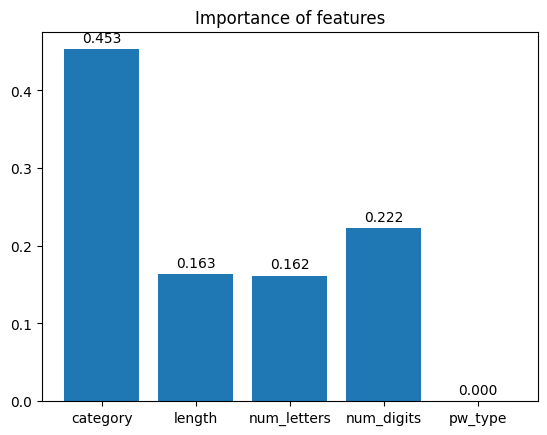

In [5]:
import matplotlib.pyplot as plt
def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()
    
visual = pd.DataFrame()
visual['feature'] = ['category', 'length', 'num_letters', 'num_digits', 'pw_type']
visual['importance'] = regressor.feature_importances_

plot_bar(visual['feature'], visual['importance'], "Importance of features")

In [69]:
# predict some passwords

passwords = [
    'password',
    'passw0rd',
    'passsw0rd',
    'a7q2y6i'
]

passwords_df = pd.DataFrame({'password': passwords})

passwords_df['category'] = ['password-related', 'password-related', 'password-related', 'password-related']
passwords_df['length'] = passwords_df['password'].apply(len)
passwords_df['num_letters'] = passwords_df['password'].str.count(r'[A-Za-z]')
passwords_df['num_digits'] = passwords_df['password'].str.count(r'[0-9]')
passwords_df['pw_type'] = np.where(passwords_df['num_letters'] > 0, 
                                    np.where(passwords_df['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                                    'Digits Only')

passwords_df['pw_type'] = le_pw.transform(passwords_df['pw_type'])
passwords_df['category'] = le_cat.transform(passwords_df['category'])

X = passwords_df[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values


X_passwords_scaled = scaler.transform(X)

y_pred = regressor.predict(X_passwords_scaled)

print(y_pred)


[[ 2.1085298]
 [27.742085 ]
 [67.27478  ]
 [ 0.4539634]]


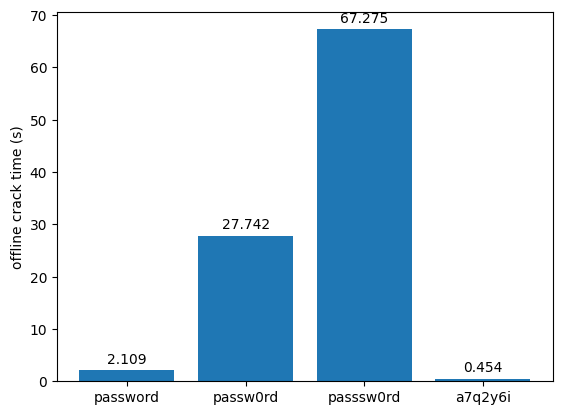

In [76]:
def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    ax.set_ylabel('offline crack time (s)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()
    
plot_bar(passwords, y_pred.reshape(-1))

[[19.282248]
 [20.12811 ]
 [18.582008]]


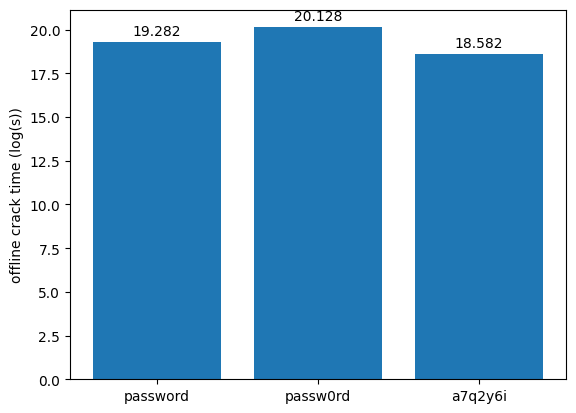

In [88]:
# predict some passwords (online crack)

passwords = [
    'password',
    'passw0rd',
    'a7q2y6i'
]

passwords_df = pd.DataFrame({'password': passwords})

passwords_df['category'] = ['password-related', 'password-related', 'password-related']
passwords_df['length'] = passwords_df['password'].apply(len)
passwords_df['num_letters'] = passwords_df['password'].str.count(r'[A-Za-z]')
passwords_df['num_digits'] = passwords_df['password'].str.count(r'[0-9]')
passwords_df['pw_type'] = np.where(passwords_df['num_letters'] > 0, 
                                    np.where(passwords_df['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                                    'Digits Only')

passwords_df['pw_type'] = le_pw.transform(passwords_df['pw_type'])
passwords_df['category'] = le_cat.transform(passwords_df['category'])

X = passwords_df[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values


X_passwords_scaled = scaler.transform(X)

y_pred = regressor.predict(X_passwords_scaled)

print(y_pred)
def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    ax.set_ylabel('offline crack time (log(s))')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()
    
plot_bar(passwords, y_pred.reshape(-1))

In [55]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np


data = pd.read_csv('./data/passwords.csv')

data['length'] = data['password'].apply(len)
data['num_letters'] = data['password'].str.count(r'[A-Za-z]')
data['num_digits'] = data['password'].str.count(r'[0-9]')
data['pw_type'] = np.where(data['num_letters'] > 0, 
                           np.where(data['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                           'Digits Only')

le_cat = LabelEncoder()
le_pw = LabelEncoder()

data['pw_type'] = le_pw.fit_transform(data['pw_type'])
data['category'] = le_cat.fit_transform(data['category'])


X = data[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values

def convert_to_seconds(value, unit):
    unit_to_seconds = {
        'seconds': 1,
        'minutes': 60,
        'hours': 3600,
        'days': 86400,
        'weeks': 604800,
        'months': 2628000,  
        'years': 31536000
    }
    return value * unit_to_seconds[unit]


data['value_in_seconds'] = data.apply(lambda row: convert_to_seconds(row['value'], row['time_unit']), axis=1)

y_off = data['offline_crack_sec'].values.reshape(-1, 1)  # target: offline 



y_on = np.log1p(data['value_in_seconds'].values.reshape(-1, 1))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


X_train_on, X_test_on, y_train_on, y_test_on = train_test_split(X_scaled, y_off, test_size=0.2, random_state=42)

X_train_off, X_test_off, y_train_off, y_test_off = train_test_split(X_scaled, y_on, test_size=0.2, random_state=42)

n=4
n_steps = 1

regressor_offline = TabNetRegressor(verbose=1, n_steps = n_steps,  n_d = n, n_a = n)
regressor_online = TabNetRegressor(verbose=1, n_steps = n_steps, n_d = n, n_a = n)

regressor_offline.fit(
    X_train_off, y_train_off,
    eval_set=[(X_test_off, y_test_off)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=1000,
    patience=50,
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

regressor_online.fit(
    X_train_on, y_train_on,
    eval_set=[(X_test_on, y_test_on)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=1000,
    patience=50,
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

passwords = [
    'hahahahaha',
    'hahahahah0',
    'a7q2y9ir0'
]

passwords_df = pd.DataFrame({'password': passwords})

passwords_df['category'] = ['password-related', 'password-related', 'password-related']
passwords_df['length'] = passwords_df['password'].apply(len)
passwords_df['num_letters'] = passwords_df['password'].str.count(r'[A-Za-z]')
passwords_df['num_digits'] = passwords_df['password'].str.count(r'[0-9]')
passwords_df['pw_type'] = np.where(passwords_df['num_letters'] > 0, 
                                    np.where(passwords_df['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                                    'Digits Only')

passwords_df['pw_type'] = le_pw.transform(passwords_df['pw_type'])
passwords_df['category'] = le_cat.transform(passwords_df['category'])

X = passwords_df[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values


X_passwords_scaled = scaler.transform(X)

y_pred = regressor_online.predict(X_passwords_scaled)
print(y_pred)

C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 185.75313| test_rmse: 13.21955|  0:00:00s
epoch 1  | loss: 185.04947| test_rmse: 13.20942|  0:00:00s
epoch 2  | loss: 184.13387| test_rmse: 13.19359|  0:00:00s
epoch 3  | loss: 183.15219| test_rmse: 13.15887|  0:00:00s
epoch 4  | loss: 182.18117| test_rmse: 13.11718|  0:00:00s
epoch 5  | loss: 181.10899| test_rmse: 13.0802 |  0:00:00s
epoch 6  | loss: 179.91454| test_rmse: 13.03945|  0:00:00s
epoch 7  | loss: 178.62602| test_rmse: 12.993  |  0:00:00s
epoch 8  | loss: 177.31674| test_rmse: 12.93411|  0:00:00s
epoch 9  | loss: 175.82195| test_rmse: 12.86268|  0:00:00s
epoch 10 | loss: 174.09505| test_rmse: 12.78692|  0:00:00s
epoch 11 | loss: 172.45767| test_rmse: 12.74045|  0:00:00s
epoch 12 | loss: 170.48204| test_rmse: 12.69417|  0:00:00s
epoch 13 | loss: 168.52866| test_rmse: 12.60816|  0:00:00s
epoch 14 | loss: 166.61258| test_rmse: 12.50307|  0:00:00s
epoch 15 | loss: 164.22404| test_rmse: 12.38145|  0:00:00s
epoch 16 | loss: 161.82912| test_rmse: 12.24936|  0:00:0

epoch 149| loss: 0.15519 | test_rmse: 0.36552 |  0:00:02s
epoch 150| loss: 0.2803  | test_rmse: 0.35764 |  0:00:02s
epoch 151| loss: 0.13846 | test_rmse: 0.29829 |  0:00:02s
epoch 152| loss: 0.13902 | test_rmse: 0.33397 |  0:00:03s
epoch 153| loss: 0.15994 | test_rmse: 0.269   |  0:00:03s
epoch 154| loss: 0.22248 | test_rmse: 0.25566 |  0:00:03s
epoch 155| loss: 0.23776 | test_rmse: 0.24125 |  0:00:03s
epoch 156| loss: 0.17641 | test_rmse: 0.23792 |  0:00:03s
epoch 157| loss: 0.17059 | test_rmse: 0.19238 |  0:00:03s
epoch 158| loss: 0.12389 | test_rmse: 0.18732 |  0:00:03s
epoch 159| loss: 0.11689 | test_rmse: 0.26788 |  0:00:03s
epoch 160| loss: 0.23346 | test_rmse: 0.18283 |  0:00:03s
epoch 161| loss: 0.21928 | test_rmse: 0.25413 |  0:00:03s
epoch 162| loss: 0.0901  | test_rmse: 0.59509 |  0:00:03s
epoch 163| loss: 0.1663  | test_rmse: 0.59504 |  0:00:03s
epoch 164| loss: 0.16983 | test_rmse: 0.33637 |  0:00:03s
epoch 165| loss: 0.15356 | test_rmse: 0.28986 |  0:00:03s
epoch 166| los

C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 10 | loss: 8.53228 | test_rmse: 0.63986 |  0:00:00s
epoch 11 | loss: 8.45017 | test_rmse: 0.63792 |  0:00:00s
epoch 12 | loss: 8.30304 | test_rmse: 0.64743 |  0:00:00s
epoch 13 | loss: 8.01988 | test_rmse: 0.64736 |  0:00:00s
epoch 14 | loss: 8.09861 | test_rmse: 0.65543 |  0:00:00s
epoch 15 | loss: 8.03224 | test_rmse: 0.59412 |  0:00:00s
epoch 16 | loss: 7.32356 | test_rmse: 0.54374 |  0:00:00s
epoch 17 | loss: 6.71306 | test_rmse: 0.59279 |  0:00:00s
epoch 18 | loss: 5.54347 | test_rmse: 0.65412 |  0:00:00s
epoch 19 | loss: 5.01373 | test_rmse: 0.71201 |  0:00:00s
epoch 20 | loss: 5.11713 | test_rmse: 0.78509 |  0:00:00s
epoch 21 | loss: 3.70111 | test_rmse: 0.99492 |  0:00:00s
epoch 22 | loss: 3.48884 | test_rmse: 1.18698 |  0:00:00s
epoch 23 | loss: 2.78202 | test_rmse: 1.37817 |  0:00:00s
epoch 24 | loss: 3.38471 | test_rmse: 1.51269 |  0:00:00s
epoch 25 | loss: 3.31845 | test_rmse: 1.67329 |  0:00:00s
epoch 26 | loss: 1.60262 | test_rmse: 1.87035 |  0:00:00s
epoch 27 | los

epoch 158| loss: 0.02093 | test_rmse: 0.05675 |  0:00:02s
epoch 159| loss: 0.03243 | test_rmse: 0.0689  |  0:00:02s
epoch 160| loss: 0.01493 | test_rmse: 0.07546 |  0:00:02s
epoch 161| loss: 0.04737 | test_rmse: 0.06653 |  0:00:02s
epoch 162| loss: 0.00886 | test_rmse: 0.06029 |  0:00:02s
epoch 163| loss: 0.031   | test_rmse: 0.06061 |  0:00:02s
epoch 164| loss: 0.00894 | test_rmse: 0.06369 |  0:00:02s
epoch 165| loss: 0.01689 | test_rmse: 0.07695 |  0:00:02s
epoch 166| loss: 0.0395  | test_rmse: 0.07041 |  0:00:02s
epoch 167| loss: 0.01162 | test_rmse: 0.05399 |  0:00:02s
epoch 168| loss: 0.04645 | test_rmse: 0.04896 |  0:00:02s
epoch 169| loss: 0.05712 | test_rmse: 0.053   |  0:00:03s
epoch 170| loss: 0.00629 | test_rmse: 0.05984 |  0:00:03s
epoch 171| loss: 0.07201 | test_rmse: 0.06302 |  0:00:03s
epoch 172| loss: 0.04104 | test_rmse: 0.07631 |  0:00:03s
epoch 173| loss: 0.01453 | test_rmse: 0.09566 |  0:00:03s
epoch 174| loss: 0.01499 | test_rmse: 0.09964 |  0:00:03s
epoch 175| los

C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [48]:
regressor_offline.feature_importances_

array([0.02842307, 0.10591602, 0.38519893, 0.19113016, 0.28933182])

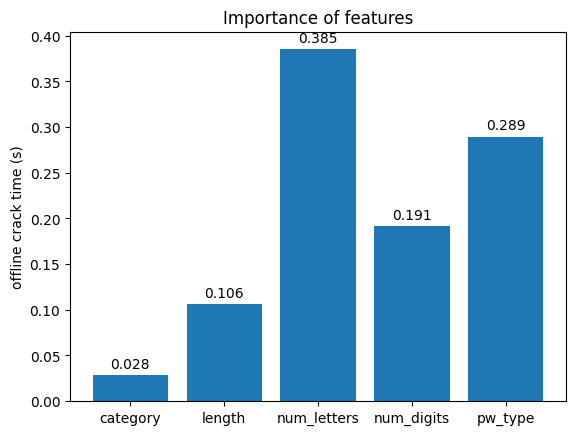

In [49]:
import matplotlib.pyplot as plt
def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    ax.set_ylabel('offline crack time (s)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()

visual = pd.DataFrame()
visual['feature'] = ['category', 'length', 'num_letters', 'num_digits', 'pw_type']
visual['importance'] = regressor_offline.feature_importances_

plot_bar(visual['feature'], visual['importance'], "Importance of features")

In [2]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np


data = pd.read_csv('./data/passwords.csv')

data['length'] = data['password'].apply(len)
data['num_letters'] = data['password'].str.count(r'[A-Za-z]')
data['num_digits'] = data['password'].str.count(r'[0-9]')
data['pw_type'] = np.where(data['num_letters'] > 0, 
                           np.where(data['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                           'Digits Only')

le_cat = LabelEncoder()
le_pw = LabelEncoder()

data['pw_type'] = le_pw.fit_transform(data['pw_type'])
data['category'] = le_cat.fit_transform(data['category'])


X = data[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values


y = data['strength'].values.reshape(-1, 1)  # target: offline 


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


n=1
n_steps = 1

regressor = TabNetRegressor(verbose=1, n_steps = n_steps,  n_d = n, n_a = n, gamma = 2)


regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=1000,
    patience=50,
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    ax.set_ylabel('offline crack time (s)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()




C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 81.58501| test_rmse: 9.80696 |  0:00:00s
epoch 1  | loss: 81.53972| test_rmse: 9.80653 |  0:00:00s
epoch 2  | loss: 81.47101| test_rmse: 9.80573 |  0:00:00s
epoch 3  | loss: 81.38577| test_rmse: 9.80458 |  0:00:00s
epoch 4  | loss: 81.25868| test_rmse: 9.80296 |  0:00:00s
epoch 5  | loss: 81.11987| test_rmse: 9.80079 |  0:00:00s
epoch 6  | loss: 80.96166| test_rmse: 9.79831 |  0:00:00s
epoch 7  | loss: 80.76811| test_rmse: 9.79474 |  0:00:00s
epoch 8  | loss: 80.60806| test_rmse: 9.79063 |  0:00:00s
epoch 9  | loss: 80.34192| test_rmse: 9.78585 |  0:00:00s
epoch 10 | loss: 80.10879| test_rmse: 9.78065 |  0:00:00s
epoch 11 | loss: 79.89574| test_rmse: 9.77528 |  0:00:01s
epoch 12 | loss: 79.54058| test_rmse: 9.76854 |  0:00:01s
epoch 13 | loss: 79.08242| test_rmse: 9.76046 |  0:00:01s
epoch 14 | loss: 78.50537| test_rmse: 9.75199 |  0:00:01s
epoch 15 | loss: 78.10554| test_rmse: 9.74053 |  0:00:01s
epoch 16 | loss: 77.51318| test_rmse: 9.72479 |  0:00:01s
epoch 17 | los

epoch 152| loss: 3.77822 | test_rmse: 2.77587 |  0:00:03s
epoch 153| loss: 5.32054 | test_rmse: 3.35171 |  0:00:03s
epoch 154| loss: 7.78057 | test_rmse: 3.63506 |  0:00:03s
epoch 155| loss: 5.11401 | test_rmse: 3.5602  |  0:00:03s
epoch 156| loss: 5.95354 | test_rmse: 3.32233 |  0:00:03s
epoch 157| loss: 4.14182 | test_rmse: 2.90742 |  0:00:03s
epoch 158| loss: 3.85386 | test_rmse: 2.64503 |  0:00:03s
epoch 159| loss: 4.04504 | test_rmse: 2.58479 |  0:00:03s
epoch 160| loss: 3.62254 | test_rmse: 2.33766 |  0:00:03s
epoch 161| loss: 5.88619 | test_rmse: 2.05649 |  0:00:04s
epoch 162| loss: 4.4594  | test_rmse: 1.98543 |  0:00:04s
epoch 163| loss: 4.94129 | test_rmse: 1.94318 |  0:00:04s
epoch 164| loss: 3.6773  | test_rmse: 1.94679 |  0:00:04s
epoch 165| loss: 4.11019 | test_rmse: 1.91778 |  0:00:04s
epoch 166| loss: 3.97804 | test_rmse: 1.973   |  0:00:04s
epoch 167| loss: 3.77738 | test_rmse: 2.01826 |  0:00:04s
epoch 168| loss: 3.69307 | test_rmse: 2.22771 |  0:00:04s
epoch 169| los

C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


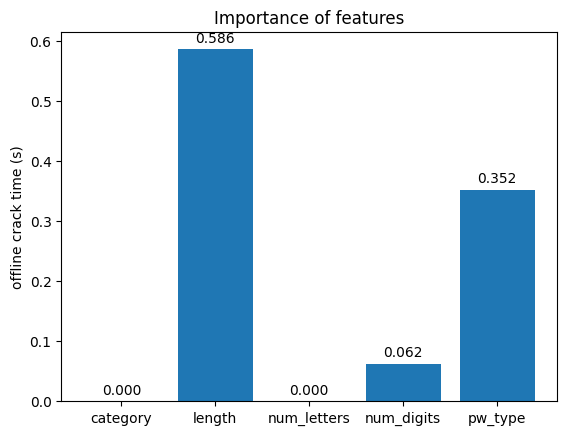

In [23]:
visual = pd.DataFrame()
visual['feature'] = ['category', 'length', 'num_letters', 'num_digits', 'pw_type']
visual['importance'] = regressor.feature_importances_

plot_bar(visual['feature'], visual['importance'], "Importance of features")

In [4]:
passwords = [
    '1234',
    '12345',
    '123456',
    '1234567',
    '12345678',
    '123456789',
    '1234567890',
    'abcd',
    'abcde',
    'abcdef',
    'abcdefg',
    'abcdefgh',
    'abcdefghi',
    'abcdefghij',
    '123a',
    '1234a',
    '12345a',
    '123456a',
    '1234567a',
    '12345678a',
    '123456789a'
]

passwords_df = pd.DataFrame({'password': passwords})

passwords_df['category'] = ['password-related'] * len(passwords)
passwords_df['length'] = passwords_df['password'].apply(len)
passwords_df['num_letters'] = passwords_df['password'].str.count(r'[A-Za-z]')
passwords_df['num_digits'] = passwords_df['password'].str.count(r'[0-9]')
passwords_df['pw_type'] = np.where(passwords_df['num_letters'] > 0, 
                                    np.where(passwords_df['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                                    'Digits Only')

passwords_df['pw_type'] = le_pw.transform(passwords_df['pw_type'])
passwords_df['category'] = le_cat.transform(passwords_df['category'])

X = passwords_df[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values


X_passwords_scaled = scaler.transform(X)

y_pred = regressor.predict(X_passwords_scaled).reshape(-1)
ret = pd.DataFrame()
ret['length'] = [4, 5, 6 ,7 , 8, 9 , 10]*3
ret['category'] = ['Numbers Only']*7 + ['Letters Only']*7 + ['Alphanumeric']*7
ret['strength'] = y_pred.tolist()

ret.to_csv('./data/tabnet_ret.csv', index = False)

In [40]:
y_pred.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [42]:
ret

,length,category
0,4,Numbers Only
1,5,Numbers Only
2,6,Numbers Only
3,7,Numbers Only
4,8,Numbers Only
5,4,Letters Only
6,5,Letters Only
7,6,Letters Only
8,7,Letters Only
9,8,Letters Only


In [44]:
y_pred.tolist()

[2.8214995861053467,
 2.8416619300842285,
 2.9107561111450195,
 2.9825971126556396,
 3.040253162384033,
 5.004236698150635,
 5.972404956817627,
 7.088500022888184,
 7.956242084503174,
 8.461663246154785,
 37.34931182861328,
 43.98417282104492,
 51.39399719238281,
 59.55695724487305,
 68.33438873291016]

In [29]:
[4, 5, 6 ,7 , 8]*3

[4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8]

In [33]:
y_pred.reshape(-1),

(array([ 2.8214996,  2.841662 ,  2.910756 ,  2.982597 ,  3.0402532,
         5.0042367,  5.972405 ,  7.0885   ,  7.956242 ,  8.461663 ,
        37.34931  , 43.984173 , 51.393997 , 59.556957 , 68.33439  ],
       dtype=float32),)